In [1]:
def read_file(file_name):
    file = open(file_name)
    data = file.read()
    file.close()
    return data

data_as_string = read_file('data/sea_level.txt')
len(data_as_string)

112240

In [2]:
data_as_list = data_as_string.split("\n")

In [3]:
good_lines = data_as_list[52:-1]

In [4]:
good_lines[0]

'   0  11  1993.0115260    466462 337277.00    -37.24     92.66    -37.02    -37.24     92.66    -37.02    -37.55'

In [5]:
# python's str.split() works for most whitespaces including tabs newlines and spaces

good_lines[0].split()

['0',
 '11',
 '1993.0115260',
 '466462',
 '337277.00',
 '-37.24',
 '92.66',
 '-37.02',
 '-37.24',
 '92.66',
 '-37.02',
 '-37.55']

In [6]:
split_data = [line.split() for line in good_lines]

# I used a 'list comprehension' [f(x) for x in list]
# e.g: [x**2 for x in range(5)] evaluates to [0, 1, 4, 9, 16]
# similar to list(map(lambda x: x**2, range(5)))

In [7]:
split_data[-2:]

[['0',
  '970',
  '2019.0474280',
  '483025',
  '347856.50',
  '48.28',
  '97.01',
  '46.18',
  '55.44',
  '99.88',
  '53.32',
  '53.64'],
 ['0',
  '971',
  '2019.0745940',
  '479261',
  '345354.00',
  '44.67',
  '96.20',
  '46.14',
  '51.84',
  '98.77',
  '53.28',
  '54.10']]

In [8]:
# converting all data to float

split_data_float = [[float(item) for item in row] for row in split_data]

In [9]:
split_data_float[-2:]

[[0.0,
  970.0,
  2019.047428,
  483025.0,
  347856.5,
  48.28,
  97.01,
  46.18,
  55.44,
  99.88,
  53.32,
  53.64],
 [0.0,
  971.0,
  2019.074594,
  479261.0,
  345354.0,
  44.67,
  96.2,
  46.14,
  51.84,
  98.77,
  53.28,
  54.1]]

In [10]:
data_as_list[31:46]

['HDR Global Mean Sea Level (GMSL) variations from TPJAOS v4.2',
 'HDR',
 'HDR column description',
 'HDR 1 altimeter type 0=dual-frequency  999=single frequency (ie Poseidon-1)',
 'HDR 2 merged file cycle #',
 'HDR 3 year+fraction of year (mid-cycle)',
 'HDR 4 number of observations',
 'HDR 5 number of weighted observations',
 'HDR 6 GMSL (Global Isostatic Adjustment (GIA) not applied) variation (mm) with respect to 20-year TOPEX/Jason collinear mean reference',
 'HDR 7 standard deviation of GMSL (GIA not applied) variation estimate (mm)',
 'HDR* 8 smoothed (60-day Gaussian type filter) GMSL (GIA not applied) variation (mm)  with respect to 20-year mean',
 'HDR* 9 GMSL (Global Isostatic Adjustment (GIA) applied) variation (mm) )  with respect to 20-year mean',
 'HDR 10 standard deviation of GMSL (GIA applied) variation estimate (mm)',
 'HDR* 11 smoothed (60-day Gaussian type filter) GMSL (GIA applied) variation (mm) )  with respect to 20-year mean',
 'HDR* 12 smoothed (60-day Gaussian

In [11]:
#   [[row1],[row2],[row3],..]

# Currently, each row is a single list. But we want each column as a single list.

#   [[col1],[col2],[col3],..]

# row1,           c c c
# row2,    zip    o o o
# row3,  <----->  l l l 
# row4            1,2,3

_, _, year, _, _, GMSL_1, _, _, _, _, _, _ = zip(*split_data_float)
# & is the "splat operator"

# another way:
# from operator import itemgetter as item
# year, GMSL_1 = item(2,5)(list(zip(*split_data_float)))

In [12]:
year[-10:]

(2018.830099,
 2018.857265,
 2018.884431,
 2018.911597,
 2018.938763,
 2018.965929,
 2018.993096,
 2019.020262,
 2019.047428,
 2019.074594)

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline

# Uncomment following line to get sharper figures on mac (might work on windows as well)
#%config InlineBackend.figure_formats = ["retina"]

Text(0.5, 0, 'GMSL')

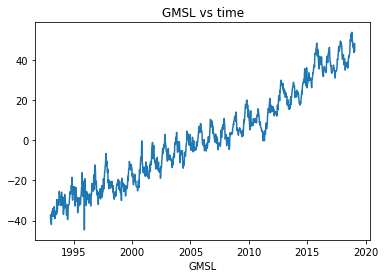

In [14]:
plt.plot(year,GMSL_1)
plt.title("GMSL vs time")
plt.xlabel("Year")
plt.xlabel("GMSL")

Text(0, 0.5, 'GMSL')

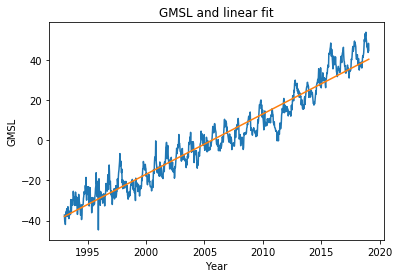

In [15]:
import numpy as np

# quick linear regression
a, b = np.polyfit(year, GMSL_1, 1)
GMSL_1_trend = [a*x+b for x in year]
############    ^^^ Use list comprehension

plt.plot(year,GMSL_1)
plt.plot(year,GMSL_1_trend)
plt.title("GMSL and linear fit")
plt.xlabel("Year")
plt.ylabel("GMSL")

Text(0, 0.5, 'GMSL')

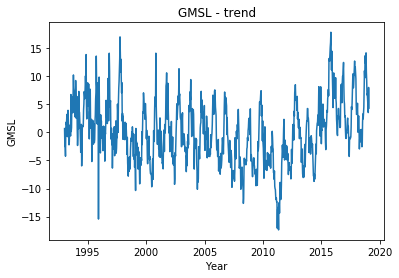

In [16]:
# subtracting the trend using a list comprehension

GMSL_1_sub_trend = [G-T for G,T in zip(GMSL_1,GMSL_1_trend)]
plt.plot(year,GMSL_1_sub_trend)
plt.title("GMSL - trend")
plt.xlabel("Year")
plt.ylabel("GMSL")

In [17]:
# checking if data points are uniformly distributed in time
# If the standard deviation was too high compared to mean, 
# I would interpolate data on a uniform time axis first
#  e.g. on np.linspace(1993.5,2019.1,900)

diff_years = np.diff(year)
# ^^^ The first difference is given by out[n] = a[n+1] - a[n] along the given axis, 
# higher differences are calculated by using diff recursively.
avg_diff_years = np.mean(diff_years)
std_diff_years = np.std(diff_years)
avg_diff_years, std_diff_years

(0.027177338894681886, 0.0008779107265888649)

len(fft_data = 110


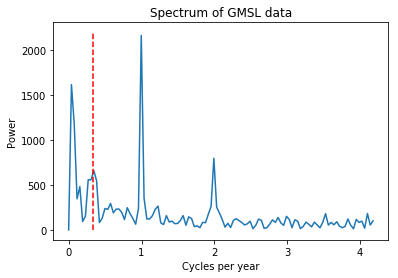

In [18]:
fft_GMSL_1 = np.absolute(np.fft.fft(GMSL_1_sub_trend))[:-850]

## fft_GMSL_1 = np.absolute(np.fft.fft(GMSL_1_sub_trend))[:450]

dt_mean = avg_diff_years
sampling_freq = 1/dt_mean # this has units 1/year (per year)
########################### ^^^ Always good to think about units
signal_len = len(GMSL_1_sub_trend)

freq = [sampling_freq*partial_len/signal_len for partial_len in range(len(fft_GMSL_1))]
plt.plot(freq,fft_GMSL_1)
plt.plot([1/3]*2,[0,2200],'r--')
plt.title("Spectrum of GMSL data")
plt.xlabel("Cycles per year")
plt.ylabel("Power")
print("len(fft_data =", len(fft_GMSL_1))

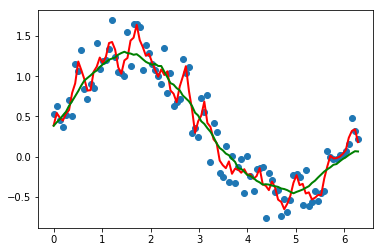

In [19]:
# Smoothing data: https://stackoverflow.com/questions/20618804/how-to-smooth-a-curve-in-the-right-way
x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.8

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

# Reference: https://docs.scipy.org/doc/numpy/reference/generated/numpy.convolve.html
#            http://docs.astropy.org/en/stable/convolution/using.html
#            https://www.youtube.com/watch?v=zZS6DYkyZIY (VIDEO)
#            https://www.youtube.com/watch?v=rzCO5fQysw0 (EXTREMELY COOL VIDEO!)
#            https://www.youtube.com/watch?v=FjmwwDHT98c (VIDEO)

plt.plot(x, y,'o')
plt.plot(x, smooth(y,3), 'r-', lw=2)
plt.plot(x, smooth(y,19), 'g-', lw=2)

In [20]:
box_pts = 5
box = np.ones(box_pts)/box_pts
box

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [24]:
smoothing_window = 10
fft_GMSL_1_smooth = np.absolute(np.fft.fft(smooth(GMSL_1_sub_trend,smoothing_window)))[:-850]

In [25]:
len(fft_GMSL_1), len(fft_GMSL_1_smooth)

(110, 110)

Text(0, 0.5, 'Power')

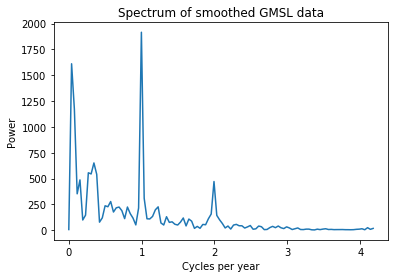

In [26]:
plt.plot(freq,fft_GMSL_1_smooth)
# plt.plot(freq,fft_GMSL_1)
plt.title("Spectrum of smoothed GMSL data")
plt.xlabel("Cycles per year")
plt.ylabel("Power")

In [27]:
fft_GMSL_1_smooth

array([   6.56315683, 1610.49960823, 1171.09051588,  352.25116241,
        486.81838329,   98.99812452,  145.75187884,  555.73722696,
        544.54218672,  650.95554199,  540.70427977,   77.94386453,
        119.71645614,  236.3855838 ,  227.17113776,  277.52591972,
        176.17121268,  216.60457129,  224.10748515,  189.26826499,
        112.14555248,  224.35019086,  160.79606814,  117.12945541,
         51.3654258 ,  214.85845447, 1915.55625481,  309.09026008,
        110.64407708,  108.98598245,  133.29671753,  197.36444736,
        225.98166444,   70.10356754,   50.49866865,  130.59830129,
         75.84156216,   81.26051356,   57.63674293,   50.39480456,
         78.54926303,  118.28310384,   41.56657473,  107.85470142,
         87.42469028,   17.95734422,   36.93376049,   18.53169856,
         55.85984466,   52.99474922,  110.97598881,  156.64236446,
        471.17433786,  143.57787132,  100.79470142,   64.85310338,
         21.86540062,   40.54757089,   11.28500776,   49.85521

In [29]:
fft_GMSL_1_smooth[1], fft_GMSL_1_smooth[9], fft_GMSL_1_smooth[26], fft_GMSL_1_smooth[52],

(1610.4996082258099, 650.9555419927026, 1915.5562548130085, 471.17433785582864)